# Machine Learning - LC09 (Project)
- Rendra Dwi Prasetyo - 2602199960
- Valentino Marcell
- Christhoper Julio Hariyanti
- Steven Liu Sentiko

In [1]:
# Library
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer, precision_score, roc_auc_score, f1_score, accuracy_score
from sklearn.svm import SVC

# Library tambahan
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
# dataset
df = pd.read_csv("GojekAppReview.csv")

Explore data 

In [3]:
df.head(25)

,userName,content,score,at,appVersion
0,Yuga Edit,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3
1,ff burik,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3
2,Anisa Suci Rahmayuliani,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3
3,naoki yakuza,Baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3
4,Trio Sugianto,Mantap,5,2022-01-15 10:05:27,4.9.3
5,Arlan Ramlan,Bagus,4,2022-02-01 05:50:40,4.9.3
6,Slamet Hariyanto,Coba dulu,2,2021-12-10 22:40:45,4.9.3
7,Hasan Thio,Ok,5,2022-02-01 03:07:45,4.9.3
8,RAFI BADZLIN,Gimana ini kak pin saya salah terus padahal ud...,1,2022-12-17 08:56:52,4.9.3
9,mariyadi qc,Biar aman kamu tidak bisa pakai gojek Jadi say...,1,2022-02-09 11:27:38,4.9.3


In [4]:
num_rows, num_cols = df.shape
print(f'Jumlah baris: {num_rows}')
print(f'Jumlah kolom: {num_cols}')

Jumlah baris: 225002
Jumlah kolom: 5


In [5]:
# Identifikasi variabel categorical dan numerical
data_types = df.dtypes
categorical_vars = data_types[data_types == 'object'].index.tolist()
numerical_vars = data_types[(data_types == 'int64') | (data_types == 'float64')].index.tolist()

print('Categorical variabel : ',categorical_vars)
print('Numercial variabel : ',numerical_vars)

Categorical variabel :  ['userName', 'content', 'at', 'appVersion']
Numercial variabel :  ['score']


In [6]:
# Membuat DataFrame untuk menyimpan hasil
result_df = pd.DataFrame(columns=["Parameter Check", "Result"])

# Memeriksa jumlah missing value per kolom
missing_values = df.isnull().sum().sum()
result_df = result_df.append({"Parameter Check": "Missing Value", "Result": missing_values}, ignore_index=True)

# Memeriksa jumlah baris yang duplikat
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_count = len(duplicate_rows)
result_df = result_df.append({"Parameter Check": "Duplikasi", "Result": duplicate_count}, ignore_index=True)

# Menemukan outlier menggunakan metode IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outlier_count = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sum()
result_df = result_df.append({"Parameter Check": "Outlier", "Result": outlier_count}, ignore_index=True)

# Menghitung jumlah simbol dalam kolom "content"
symbol_count = df["content"].str.count('[^\w\s]').sum()  # Menghitung semua simbol kecuali karakter alfanumerik dan spasi
result_df = result_df.append({"Parameter Check": "Jumlah Simbol", "Result": symbol_count}, ignore_index=True)

# Menampilkan hasil dalam tabel
result_df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16304\538786897.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({"Parameter Check": "Missing Value", "Result": missing_values}, ignore_index=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16304\538786897.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({"Parameter Check": "Duplikasi", "Result": duplicate_count}, ignore_index=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16304\538786897.py:14: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16304\538786897

,Parameter Check,Result
0,Missing Value,0
1,Duplikasi,0
2,Outlier,0
3,Jumlah Simbol,0


##### Data udah clear ! 

In [7]:
# remove kolom nama untuk privacy dan buat kurangi bias
df = df.drop(columns=['userName']);

#df = df.drop(columns=['at']);
df = df.drop(columns=['appVersion']);

# Mengubah format kolom 'at' hanya berinformasikan tahun
df['at'] = pd.to_datetime(df['at']).dt.year


In [8]:
# check perubahan
df.head()

,content,score,at
0,akun gopay saya di blok,1,2022
1,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021
2,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021
3,Baru download gojek dan hape baru trus ditop u...,1,2022
4,Mantap,5,2022


In [9]:
# Map 1-2 review jadi Negative,3 jadi netral, dan 4-5 jadi Positive.
target_map = {1: 'negative', 2: 'negative', 3: 'neutral', 4: 'positive', 5: 'positive'}
df['target'] = df['score'].map(target_map)

target_map = {'negative': 0, 'neutral': 1, 'positive' : 2}
df['target_binary'] = df['target'].map(target_map)

In [10]:
target_counts = df['target'].value_counts()

# print hasil mapping kategori
print("Jumlah nilai positif (Positive):", target_counts['positive'])
print("Jumlah nilai positif (Neutral):" , target_counts['neutral'])
print("Jumlah nilai negatif (Negative):", target_counts['negative'])

Jumlah nilai positif (Positive): 161371
Jumlah nilai positif (Neutral): 9460
Jumlah nilai negatif (Negative): 54171


In [11]:
# standarisasi untuk nama kolom
df.columns = ['text', 'score','Date','target','target_binary']

In [12]:
#Checking the different
df.head()

,text,score,Date,target,target_binary
0,akun gopay saya di blok,1,2022,negative,0
1,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021,neutral,1
2,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021,positive,2
3,Baru download gojek dan hape baru trus ditop u...,1,2022,negative,0
4,Mantap,5,2022,positive,2


<Axes: xlabel='target', ylabel='count'>

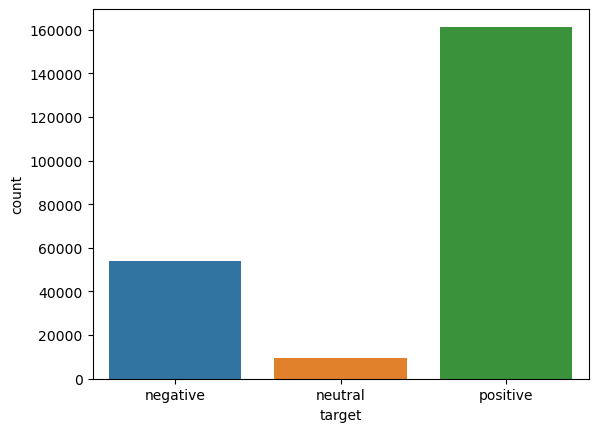

In [13]:
sns.countplot(data=df, x='target')

## Text Preprocessing

In [15]:
import nltk
from nlp_id.lemmatizer import Lemmatizer
from indoNLP.preprocessing import replace_slang, replace_word_elongation

In [16]:
lemmatizer = Lemmatizer()

def preprocess_text(text):
    text = lemmatizer.lemmatize(text)
    text = replace_slang(text)
    text = replace_word_elongation(text)
    text = text.strip()
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]
    stopwords = nltk.corpus.stopwords.words('indonesian')
    tokens = [token for token in tokens if token not in stopwords]
    return " ".join(tokens)

df['text_processed'] = df['text'].apply(preprocess_text)

In [17]:
# Determine X and Y
X = df['text_processed']
y = df['target_binary']

# Split data jadi data train dan data test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# TFid untuk mengubah data ke vektor, dengan 3000 kata paling umum
vectorizer = TfidfVectorizer(max_features=3000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


# Implementasi ke model Machine Learning

### Support Vector machine (SVM)

In [19]:
# implementasi ke SVM Model rbf (Radial Basis Function).
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

### Naive Bayes

In [20]:
# implementasi ke Naive Bayes Model
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

### Logistic regression

In [21]:
# implementasi ke Logistic Regression Model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

### Random Forest Model

In [22]:
# implementasi ke Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Hasil

In [23]:
# Hasil akurasi 
print('SVM Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))
print('Naive Bayes Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred_nb)))
print('Logistic Regression Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred_lr)))
print('Random Forest Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred_rf)))

SVM Model accuracy : 0.884
Naive Bayes Model accuracy : 0.877
Logistic Regression Model accuracy : 0.880
Random Forest Model accuracy : 0.873


In [24]:
# Import pickle untuk menyimpan model
import pickle

In [25]:
# Save models, vectorizer, and target map to a pickle file
with open('sentiment_models_FULL_new.pkl', 'wb') as file:
    pickle.dump((svc, nb, lr, rf, vectorizer, target_map), file)

print("Models and other components have been saved successfully!")

Models and other components have been saved successfully!
